## Check of qiskit functions
- Quantum circuit initialize function  
https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.initialize.html
- controlled swap gate

In [39]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit import Aer

## Initialization
#### single qubit case

In [41]:
circuit = QuantumCircuit(1,1)
theta = np.pi/6
#circuit.initialize([1/np.sqrt(2), -1/np.sqrt(2)],0)
circuit.initialize([np.cos(theta), np.sin(theta)],0)
circuit.measure(0,0)

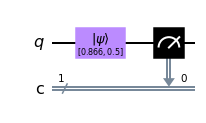

In [42]:
circuit.draw('mpl')

In [43]:
## results
shots = 10000
backend = Aer.get_backend('qasm_simulator')
job = backend.run(circuit,shots=shots)
job_result = job.result()
counts = job_result.get_counts(circuit)
print(counts)

{'0': 7501, '1': 2499}


## Initialization2
#### multi qubit

In [44]:
A = np.array([2,9,8,5])
B = np.array([7,5,10,3])

norm_A = np.sqrt(np.sum(A**2))
norm_B = np.sqrt(np.sum(B**2))
Dist = np.sqrt(np.sum((A-B)**2))

Z = norm_A**2 + norm_B**2

phi = [norm_A/np.sqrt(Z), -norm_B/np.sqrt(Z)]
psi_0 = A/norm_A/np.sqrt(2)
psi_1 = B/norm_B/np.sqrt(2)

psi = []
for i in range(len(A)):
    psi.append(psi_0[i])
    psi.append(psi_1[i])

In [45]:
def normalize(vec):
    norm = np.sqrt(np.sum(np.array(vec)**2))
    return np.array(vec)/norm

In [46]:
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

0.6666666666666669 0.1666666666666667


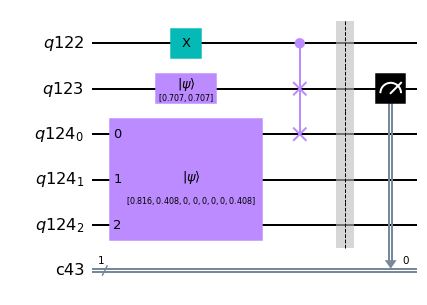

In [119]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

circuit0 = QuantumRegister(1)
circuit1 = QuantumRegister(1)
circuit2 = QuantumRegister(3)
c = ClassicalRegister(1)
circuit = QuantumCircuit(circuit0, circuit1, circuit2,c)
#circuit.initialize([0, np.cos(theta), np.sin(theta), 0], circuit.qubits)
#circuit.initialize([0,1,0,0], circuit.qubits)
#circuit.initialize(psi, circuit1)
circuit.initialize(normalize([1,1]), circuit1)
psi = normalize([2,1,0,0,0,0,0,1])
circuit.initialize(psi, circuit2)

print(psi[0]**2, psi[1]**2)
#
circuit.x(circuit0[0])
#circuit.h(circuit0[0])

#cswap
circuit.cswap(circuit0[0], circuit1[0], circuit2[0])

#
circuit.barrier()
#
circuit.measure(circuit1,c)
circuit.draw('mpl')


In [120]:
## results
shots = 10000
backend = Aer.get_backend('qasm_simulator')
job = backend.run(circuit,shots=shots)
job_result = job.result()
counts = job_result.get_counts(circuit)
print(counts)

{'1': 3417, '0': 6583}


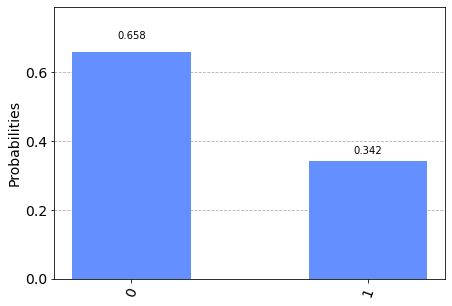

In [121]:
plot_histogram(counts)

In [50]:
import qiskit.tools.jupyter
%qiskit_version_table